In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv("adult.csv")
dataset["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [10]:
dataset["income"]=dataset["income"].replace({"<=50K":0,">50K":1})

Exploratory Analysis of data

/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

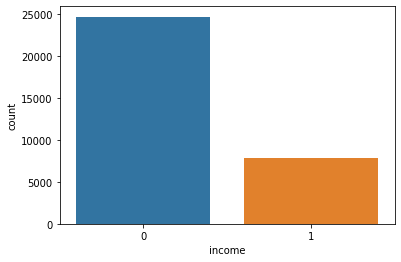

In [16]:
sns.countplot(dataset["income"],label="Count")

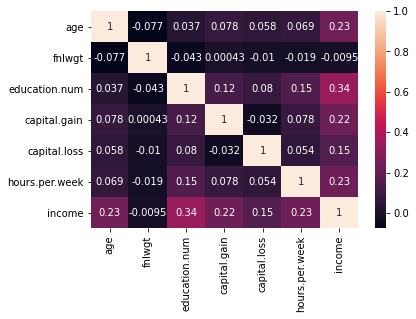

In [19]:
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

corrmap=sns.heatmap(dataset[numeric_features].corr(),annot=True)

/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


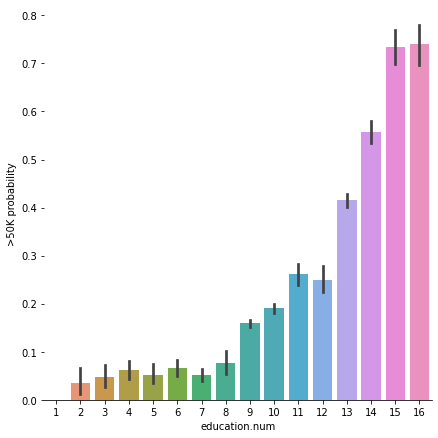

In [20]:
plot=sns.factorplot(x="education.num",y="income",data=dataset,kind="bar",size=6)
plot.despine(left=True)
plot=plot.set_ylabels(">50K probability")

/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


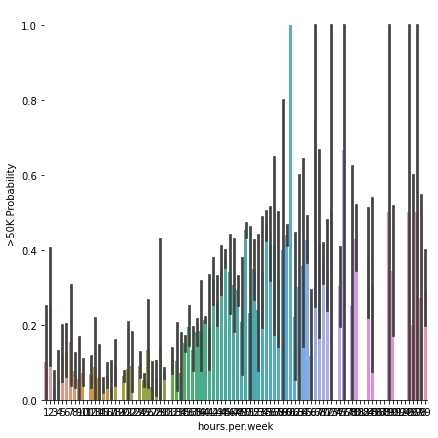

In [21]:
plot=sns.factorplot(x="hours.per.week",y="income",data=dataset,kind="bar",size=6)
plot.despine(left=True)
plot=plot.set_ylabels(">50K Probability")

/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


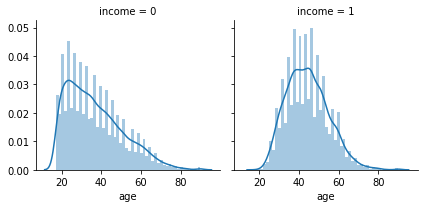

In [23]:
g = sns.FacetGrid(dataset, col='income')
g = g.map(sns.distplot, "age")

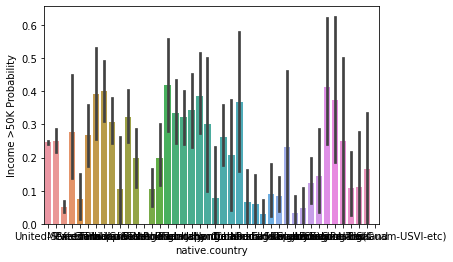

In [26]:
# Explore Native Nation vs Income
g = sns.barplot(x="native.country",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")

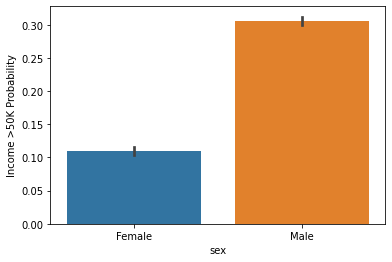

In [27]:
g = sns.barplot(x="sex",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")

/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


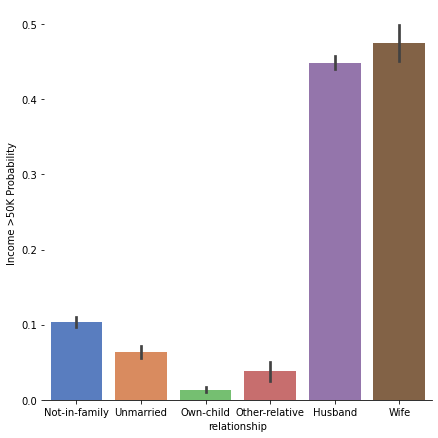

In [29]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


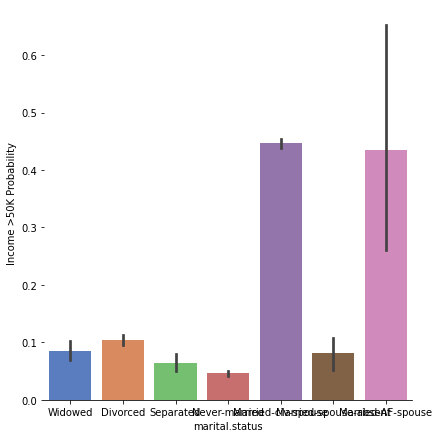

In [30]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital.status",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/adamsmith/.local/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


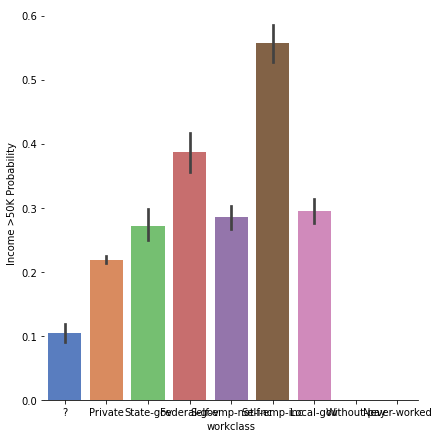

In [31]:
# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

In [38]:
from sklearn.model_selection import train_test_split
x=dataset.drop("income",axis=1)
y=dataset["income"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
    le=LabelEncoder()
    x_train[feature]=le.fit_transform(x_train[feature])
    x_test[feature]=le.transform(x_test[feature])
       

<ipython-input-42-31dea282c5ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[feature]=le.fit_transform(x_train[feature])
<ipython-input-42-31dea282c5ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[feature]=le.transform(x_test[feature])


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)

x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [52]:
from sklearn.ensemble import RandomForestClassifier

reg=RandomForestClassifier()

reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.862582527253186
